In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd '/content/drive/MyDrive/dean1'

/content/drive/MyDrive/dean1


In [ ]:
!ls

cleaned_data.csv  Datagoc.csv


In [ ]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Datagoc.csv')

In [ ]:
data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


# **A.Tiền xử lý dữ liệu**

In [ ]:
# Kiểm tra và đếm số lượng giá trị null trong mỗi cột
null_counts = data.isnull().sum()

# Lọc ra những cột có tổng số giá trị null lớn hơn 0
columns_with_null = null_counts[null_counts > 0]

# In ra những cột có tổng số giá trị null lớn hơn 0
print("Các cột có tổng số giá trị null lớn hơn 0:")
print(columns_with_null)


Các cột có tổng số giá trị null lớn hơn 0:
Series([], dtype: int64)


In [ ]:
duplicate_rows = data[data.duplicated()]

if len(duplicate_rows) == 0:
    print("Không có dòng trùng nhau trong DataFrame.")
else:
    print("Các dòng trùng nhau trong DataFrame:")
    print(duplicate_rows)

Không có dòng trùng nhau trong DataFrame.


In [ ]:
# Tính lương trung bình
avg_salarys = []
avg_salary = 0
for value in data['Salary Estimate']:
  if value.find('Per Hour') == -1:
    s = value
    m = re.findall(r'\d+', s)
    avg_salary = (int(m[0]) + int(m[1])) * 0.5 * 1000
  else:
    s = value
    m = re.findall(r'\d+', s)
    avg_salary = (int(m[0]) + int(m[1])) * 0.5 * 2080
  avg_salarys.append(avg_salary)

In [ ]:
#Tứ phân vị của Salary và phân lớp
print('Tứ phân vị của Salary')
Q1 = np.quantile(avg_salarys, 0.25)
Q2 = np.quantile(avg_salarys, 0.5)
Q3 = np.quantile(avg_salarys, 0.75)
print('Q1 = ', Q1)
print('Q2 = ', Q2)
print('Q3 = ', Q3)
data['Salary class'] = pd.cut(avg_salarys, bins=[float('-inf'), Q1, Q2, Q3, float('inf')],
                       labels=['Low', 'Medium', 'High', 'Very High'])

Tứ phân vị của Salary
Q1 =  73500.0
Q2 =  97500.0
Q3 =  122500.0


In [ ]:
# Tính revenue trung bình
# Các revenue có trong bộ dữ liệu
# ['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
# '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
# 'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
# '$25 to $50 million (USD)', '$10+ billion (USD)',
# '$1 to $5 million (USD)', '$10 to $25 million (USD)',
# '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
# '$5 to $10 million (USD)']
avg_revenues = []
avg_revenue = 0
for value in data['Revenue']:
  if value.find('$500 million to $1 billion (USD)') != -1:
    s = value
    m = re.findall(r'\d+', s)
    avg_revenue = (int(m[0]) + int(m[1]) * 1000 ) * 0.5 * 1000000
  elif value.find('Unknown / Non-Applicable') != -1:
    avg_revenue = -1
  elif value.find('Less than $1 million (USD)') != -1:
    avg_revenue = 500000
  elif value.find('$10+ billion (USD)') != -1:
    avg_revenue = 10000000
  elif value.find('to') != -1 and value.find('million') != -1:
    s = value
    m = re.findall(r'\d+', s)
    avg_revenue = (int(m[0]) + int(m[1])) * 0.5 * 1000000
  elif value.find('to') != -1 and value.find('billion') != -1:
    s = value
    m = re.findall(r'\d+', s)
    avg_revenue = (int(m[0]) + int(m[1])) * 0.5 * 1000000000
  avg_revenues.append(avg_revenue)
data['Revenue Avg'] = avg_revenues

In [ ]:
# Tính size trung bình
avg_sizes = []
avg_size = 0
for value in data['Size']:
  if (value.find('501 - 1000')     != -1
    or value.find('1001 - 5000')   != -1
    or value.find('51 - 200')      != -1
    or value.find('201 - 500')     != -1
    or value.find('5001 - 10000' ) != -1
    or value.find('1 - 50')        != -1) :
    s = value
    m = re.findall(r'\d+', s)
    avg_size = round((int(m[0]) + int(m[1])) * 0.5)
  elif value.find('10000+') != -1:
    avg_size = 10000
  elif value.find('unknown') != -1:
    avg_size = -1
  avg_sizes.append(avg_size)
data['Size Avg'] = avg_sizes

In [ ]:
# Tính mode cho mỗi cột
modes = {}
for column_name in ['Revenue Avg', 'Founded', 'Age', 'Size Avg', 'Rating']:
    values = data[column_name].replace(-1, np.nan)
    mode_value = values.mode().iloc[0]
    modes[column_name] = mode_value

# Thay thế giá trị -1 bằng mode cho mỗi cột
data['Revenue Avg'] = data['Revenue Avg'].replace(-1, modes['Revenue Avg'])
data['Founded']     = data['Founded'].replace(-1, modes['Founded'])
data['Age']         = data['Age'].replace(-1, modes['Age'])
data['Size Avg']    = data['Size Avg'].replace(-1, modes['Size Avg'])
data['Rating']      = data['Rating'].replace(-1, modes['Rating'])

In [ ]:
# Tứ phân vị của Revenue và phân lớp
print('Tứ phân vị của Revenue')
Q1 = np.quantile(data['Revenue Avg'], 0.25)
Q2 = np.quantile(data['Revenue Avg'], 0.5)
Q3 = np.quantile(data['Revenue Avg'], 0.75)
print('Q1 = ', Q1)
print('Q2 = ', Q2)
print('Q3 = ', Q3)
data['Revenue class'] = pd.cut(data['Revenue Avg'], bins=[float('-inf'), Q1, Q2, Q3, float('inf')],
                       labels=['Low', 'Medium', 'High', 'Very High'])

Tứ phân vị của Revenue
Q1 =  10000000.0
Q2 =  17500000.0
Q3 =  300000000.0


In [ ]:
# Đổi các giá trị Binary (0,1) Thành các biến định danh (No, Yes)
data['Hourly'] = data['Hourly'].replace({0: 'NO', 1: 'YES'})
data['Employer provided'] = data['Employer provided'].replace({0: 'NO', 1: 'YES'})

python_index = data.columns.get_loc('Python')
google_an_index = data.columns.get_loc('google_an') + 1
data.iloc[:, python_index:google_an_index] = data.iloc[:, python_index:google_an_index].replace({0: 'NO', 1: 'YES'})


In [ ]:
# Kết quả sau phân lớp
print("Salary class:", data['Salary class'].cat.categories.tolist())
print("Revenue class:", data['Revenue class'].cat.categories.tolist())

Salary class: ['Low', 'Medium', 'High', 'Very High']
Revenue class: ['Low', 'Medium', 'High', 'Very High']


In [ ]:
# Lưu vào file cleaned_data
data.to_csv('cleaned_data.csv', index=False)

In [ ]:
data.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree,Salary class,Revenue Avg,Size Avg,Revenue class
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,NO,NO,NO,data scientist,na,M,Low,7.500000e+07,750,High
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,NO,NO,NO,data scientist,na,M,Medium,3.500000e+09,10000,Very High
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,NO,NO,NO,data scientist,na,M,Medium,3.000000e+08,750,High
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,NO,NO,NO,data scientist,na,na,Medium,7.500000e+08,3000,Very High
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,NO,NO,NO,data scientist,na,na,High,1.000000e+07,126,Low


In [ ]:
datas = pd.read_csv('cleaned_data.csv')

#**B.Phân tích và trực quan hóa**

## **1. Các tiểu bang có nhiều việc làm nhất**

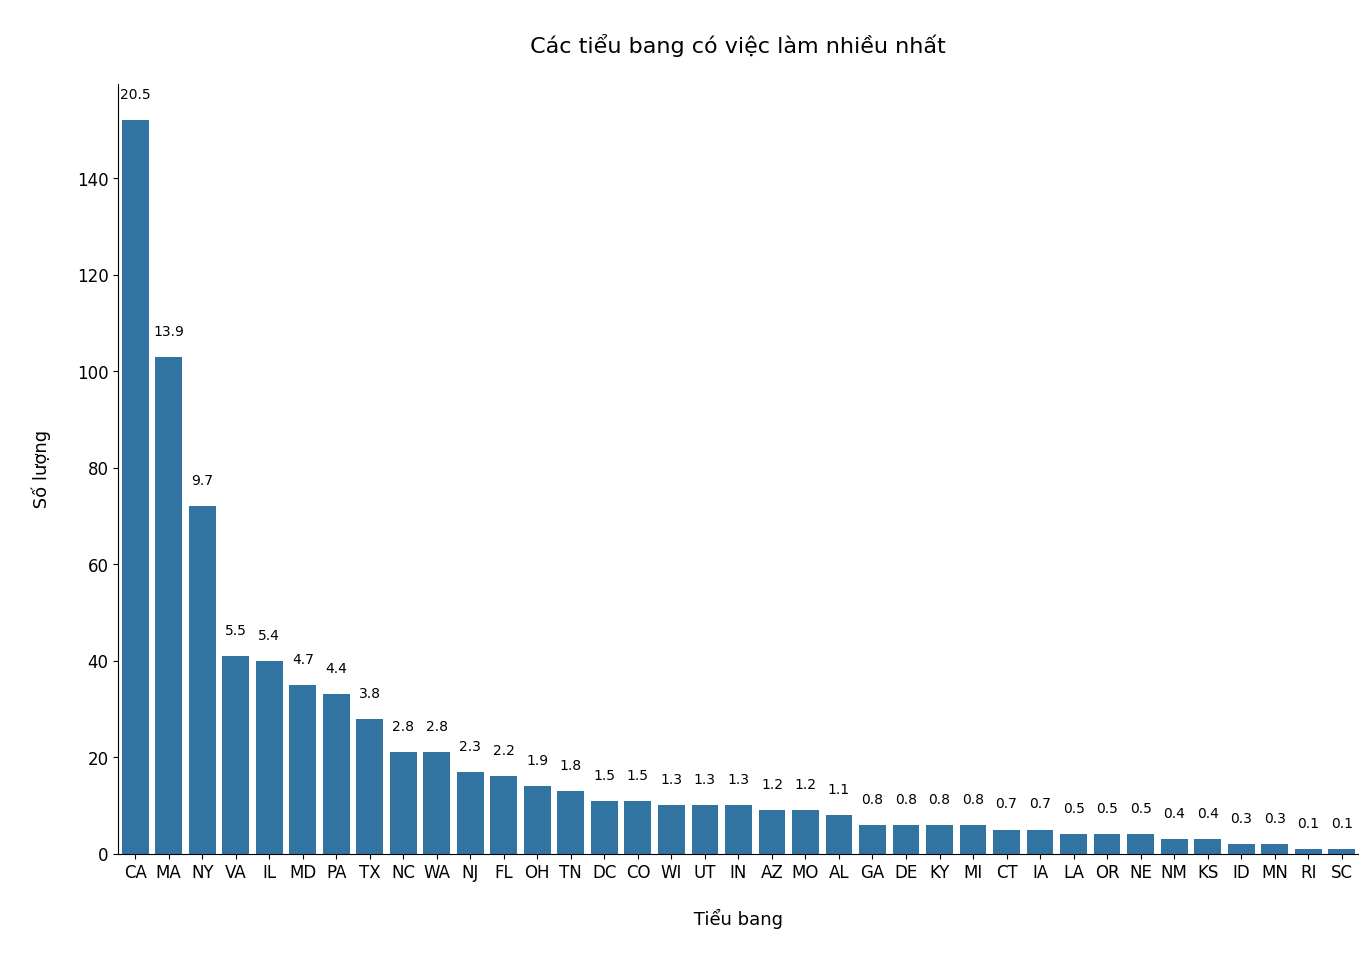

In [ ]:
# Tạo một figure với kích thước lớn hơn
fig, ax = plt.subplots(figsize=(16, 10))

# Tạo biểu đồ cột với bảng màu đã tạo
sns.barplot(x=datas["Job Location"].value_counts().index, y=datas["Job Location"].value_counts(), ax=ax)

# Loại bỏ các đường viền trên và bên phải
sns.despine(bottom=False, left=False)

# Đặt % trên từng cột
total_jobs = datas["Job Location"].value_counts().sum()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2.0, p.get_height() + 4.5, '{:.1f}'.format((p.get_height() / total_jobs) * 100), ha='center')

# Tùy chỉnh biểu đồ
plt.title('\n Các tiểu bang có việc làm nhiều nhất \n', size=16)
plt.xlabel('\n Tiểu bang \n', fontsize=13)
plt.ylabel('\n Số lượng \n', fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

## **2. Mức lương trung bình của từng tiểu bang trong khu vực**

<ipython-input-24-86b5f2269400>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y="Job Location", x="Average Salary", data=avg_salary_by_state, palette=palette, dodge=False)
<ipython-input-24-86b5f2269400>:7: UserWarning: 
The palette list has fewer values (10) than needed (37) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(y="Job Location", x="Average Salary", data=avg_salary_by_state, palette=palette, dodge=False)


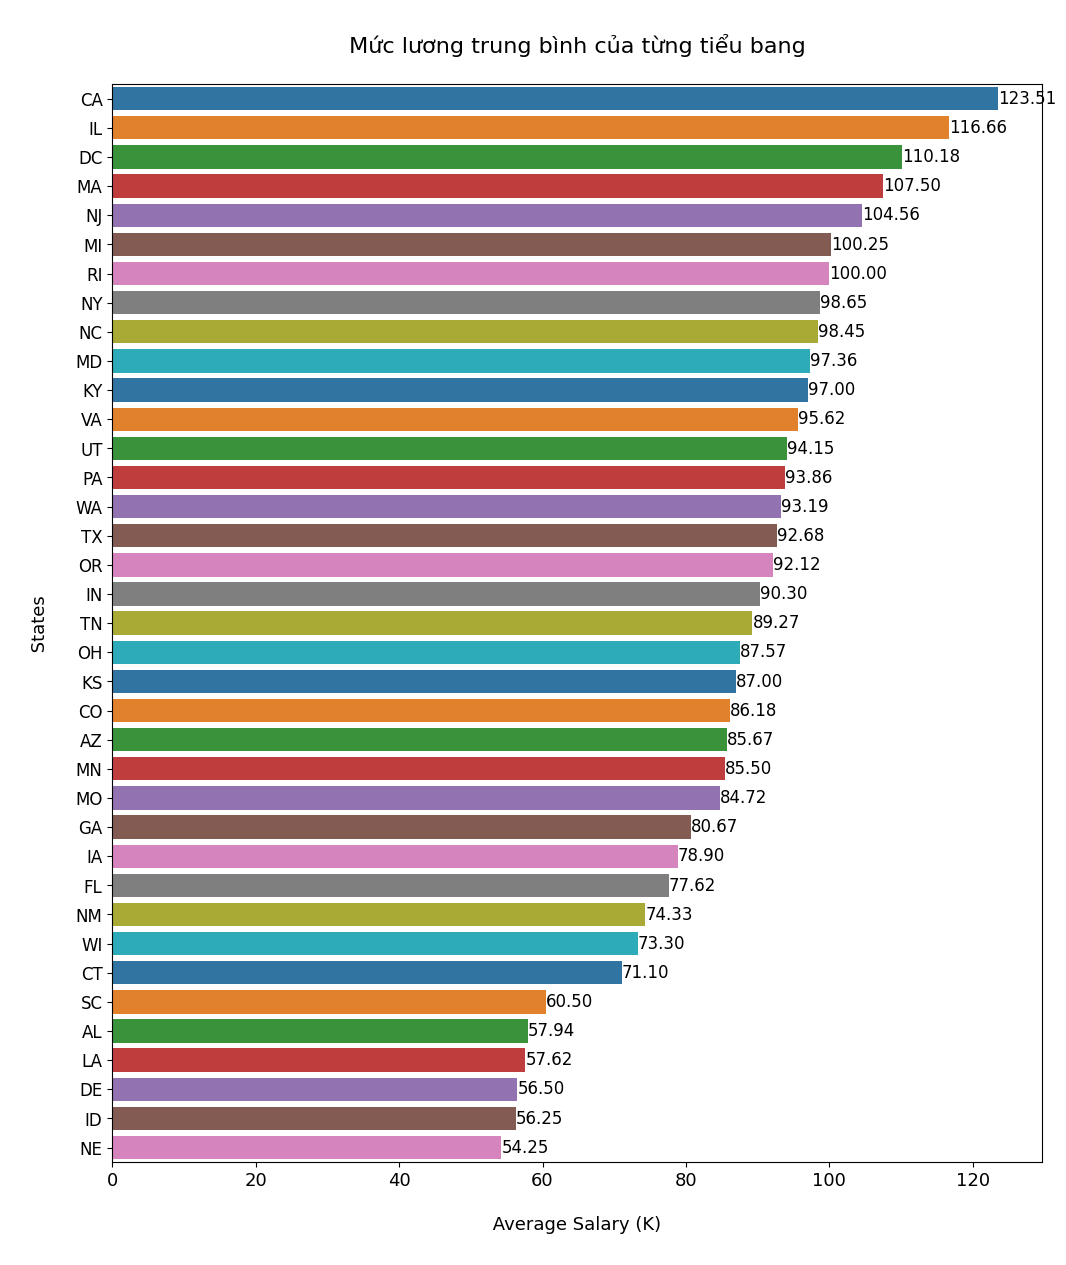

In [ ]:
avg_salary_by_state = datas.groupby("Job Location")["Avg Salary(K)"].mean().sort_values(ascending=False)
avg_salary_by_state = avg_salary_by_state.reset_index().rename(columns={"Job Location": "Job Location", "Avg Salary(K)": "Average Salary"})

# Setting up the plot
plt.figure(figsize=(12, 14))
palette = sns.color_palette()
ax = sns.barplot(y="Job Location", x="Average Salary", data=avg_salary_by_state, palette=palette, dodge=False)

# Adding title and labels
plt.title('\n Mức lương trung bình của từng tiểu bang \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Average Salary (K) \n', fontsize=13, color='black')
plt.ylabel('\n States \n', fontsize=13, color='black')

# Annotating the bars with the average salary values
for index, value in enumerate(avg_salary_by_state["Average Salary"]):
    ax.text(value, index, f'{value:.2f}', color='black', ha="left", va="center", fontsize=12)

# Display the plot
plt.show()



## **3. Mức lương trung bình tối đa và tối thiểu ở các khu vực khác nhau**

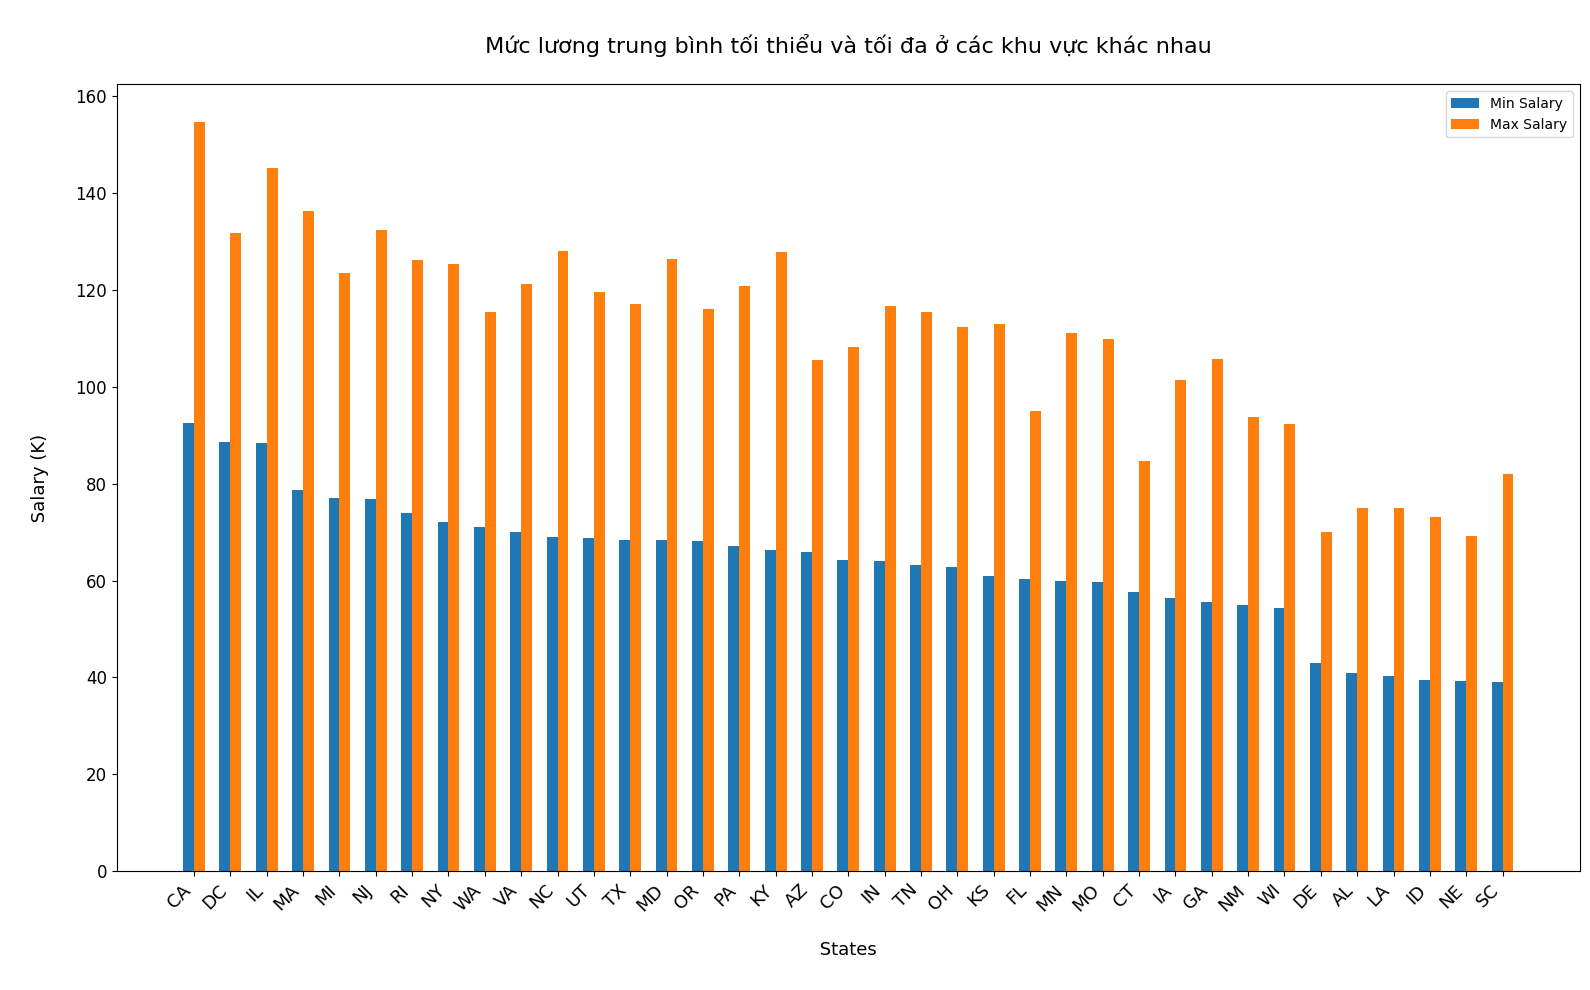

In [ ]:
# Tính toán giá trị trung bình của cột "Lower Salary" và "Upper Salary" theo cột "Job Location"
a = datas.groupby("Job Location")[["Lower Salary", "Upper Salary"]].mean().reset_index()

# Sắp xếp lại DataFrame theo "Lower Salary" và "Upper Salary"
a = a.sort_values(by=["Lower Salary", "Upper Salary"], ascending=[False, False])

# Vẽ biểu đồ cột nhóm
state = a["Job Location"]
x = np.arange(len(state))  # vị trí các nhóm
width = 0.3  # độ rộng của các cột

fig, ax = plt.subplots(figsize=(16, 10))
rects1 = ax.bar(x - width/2, a["Lower Salary"], width, label='Min Salary')
rects2 = ax.bar(x + width/2, a["Upper Salary"], width, label='Max Salary')

# Tùy chỉnh biểu đồ
plt.title('\n Mức lương trung bình tối thiểu và tối đa ở các khu vực khác nhau \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n States \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')

ax.set_xticks(x)
ax.set_xticklabels(state, rotation=45, ha='right')
ax.legend()

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

## **4. Top 5 ngành có số lượng tuyển dụng liên quan tới khoa học dữ liệu**

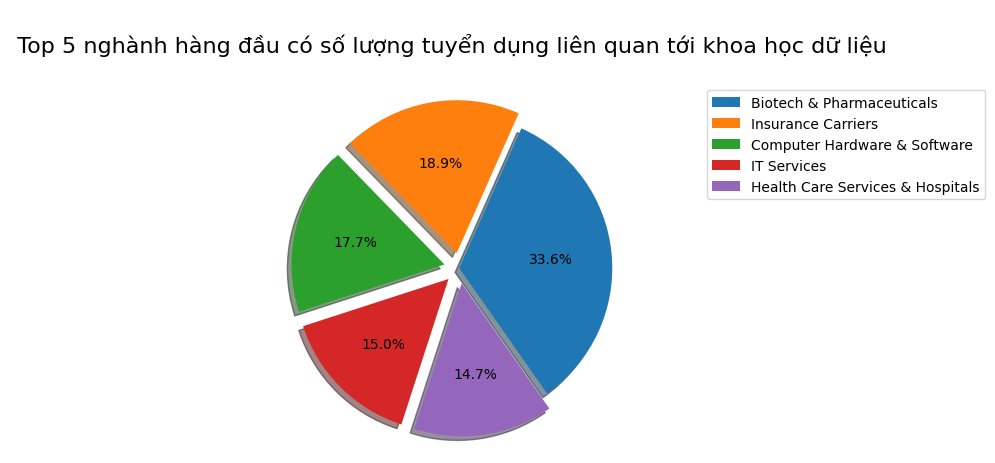

In [ ]:

# Assuming 'datas' is your DataFrame
my_explode = (0, 0.1, 0.1, 0.1, 0.1)
labels = [x for x in datas["Industry"].value_counts().sort_values(ascending=False)[0:5].index]  # piechart for only top 5 industry
patches, ax, text = plt.pie(datas["Industry"].value_counts().sort_values(ascending=False)[0:5], autopct='%1.1f%%', explode=my_explode, shadow=True, startangle=305)
plt.title('\n Top 5 nghành hàng đầu có số lượng tuyển dụng liên quan tới khoa học dữ liệu \n', size=16, color='black')
plt.legend(patches, labels, loc="best", bbox_to_anchor=(1, 1))  # Move the legend outside the plot
plt.axis('equal')
plt.show()


## **5. Top 5 ngành có mức lương tối đa và tối thiểu cao nhất**

In [ ]:
# Nhóm dữ liệu theo ngành hàng và tính toán giá trị trung bình của "Lower Salary" và "Upper Salary"
avg_salary_by_industry = datas.groupby("Industry")[["Lower Salary", "Upper Salary"]].mean().reset_index()

# Lấy 5 ngành hàng đầu tiên
top_5_industries = datas["Industry"].value_counts().sort_values(ascending=False).index[:5]

# Lọc dữ liệu chỉ chứa các ngành hàng đầu tiên
avg_salary_top_5_industries = avg_salary_by_industry[avg_salary_by_industry["Industry"].isin(top_5_industries)]

# Hiển thị mức lương trung bình tối thiểu và tối đa cho 5 ngành hàng đầu
print(avg_salary_top_5_industries)


                            Industry  Lower Salary  Upper Salary
8          Biotech & Pharmaceuticals     79.883929    144.357143
11      Computer Hardware & Software     84.881356    145.508475
28  Health Care Services & Hospitals     56.346939     97.775510
30                       IT Services     78.280000    127.400000
33                Insurance Carriers     77.793651    133.460317


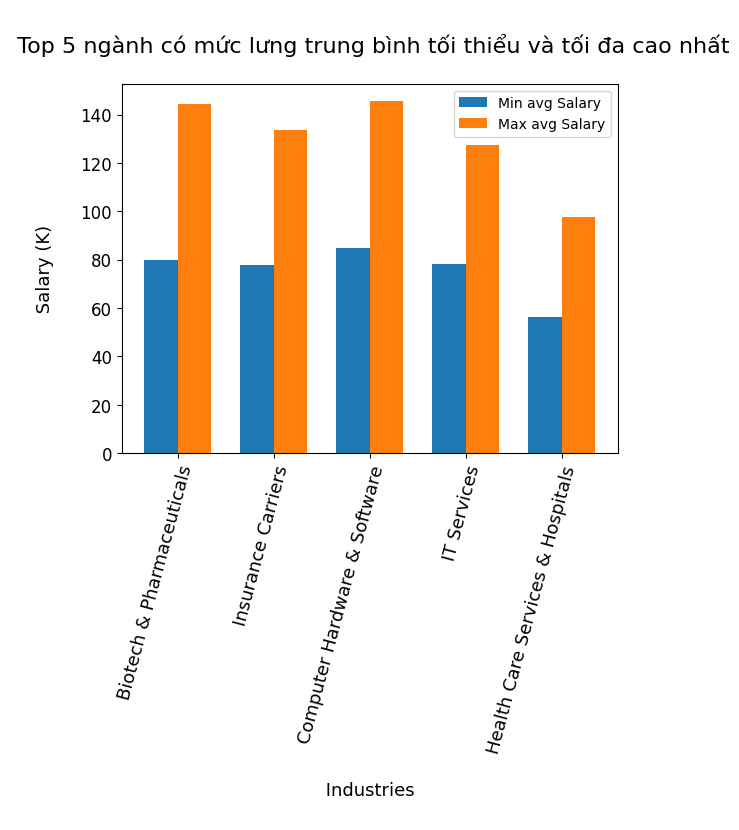

In [ ]:
sort_ind = datas["Industry"].value_counts().sort_values(ascending=False).index

ind = datas.groupby("Industry")[["Lower Salary", "Upper Salary"]].mean().sort_values("Industry", ascending=False)
ind = ind.reset_index()

# Converting Industry column as Category and setting the sorter.

ind["Industry"] = ind["Industry"].astype("category")
ind["Industry"] = ind["Industry"].cat.set_categories(sort_ind)

#Resetting and droping the index

ind = ind.sort_values(["Industry"]).reset_index()
ind = ind.drop("index",axis=1)
ind.head(2)
# Drawing the grouped bar plot.

lab=[]
for i in sort_ind[0:5]:
  lab.append(i)

x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(1)
rects1 = ax.bar(x - width/2, ind["Lower Salary"][0:5], width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, ind["Upper Salary"][0:5], width, label='Max avg Salary')

#Beautifying the plot
plt.title('\n Top 5 ngành có mức lưng trung bình tối thiểu và tối đa cao nhất\n', size=16, color='black')
plt.xticks(fontsize=13)
plt.xticks(rotation=75,ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Industries \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")
plt.show()



## **6. Top 10 công ty có số lượng tuyển dụng cao nhất**

In [ ]:
datas["company_txt"].value_counts().sort_values(ascending=False).head(10)


company_txt
MassMutual                        14
Takeda Pharmaceuticals            14
Reynolds American                 14
Software Engineering Institute    11
PNNL                              10
Liberty Mutual Insurance          10
AstraZeneca                        9
MITRE                              8
Pfizer                             7
Rochester Regional Health          7
Name: count, dtype: int64

In [ ]:
datas.company_txt.nunique()

343

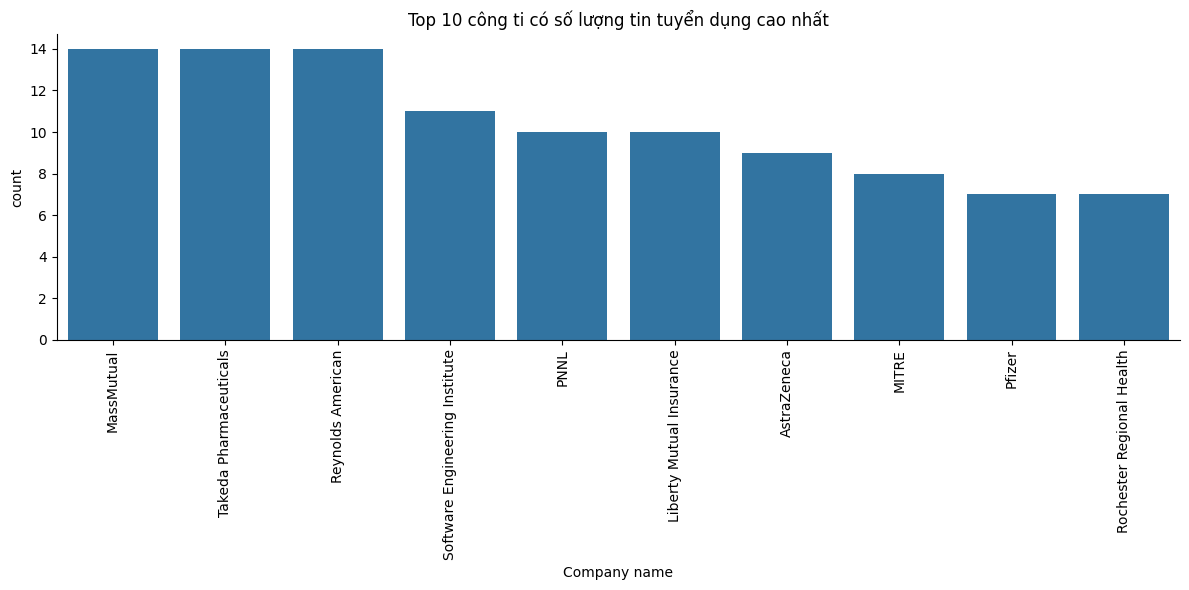

In [ ]:

# Create a larger figure with increased figsize
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart
sns.barplot(x=datas["company_txt"].value_counts().sort_values(ascending=False).head(10).index,
            y=datas["company_txt"].value_counts().sort_values(ascending=False).head(10), ax=ax)

# Remove top and right borders
sns.despine(bottom=False, left=False)


# Beautify the plot
plt.title('Top 10 công ti có số lượng tin tuyển dụng cao nhất', size=12, color='black')  # Increase the fontsize of the title
plt.xticks(fontsize=10, rotation=90)
plt.yticks(fontsize=10)
plt.xlabel('Company name', fontsize=10, color='black')


plt.tight_layout()
plt.show()



## **7.Top 5 công ti có mức lương trung bình tối đa và tối thiểu cao nhất**

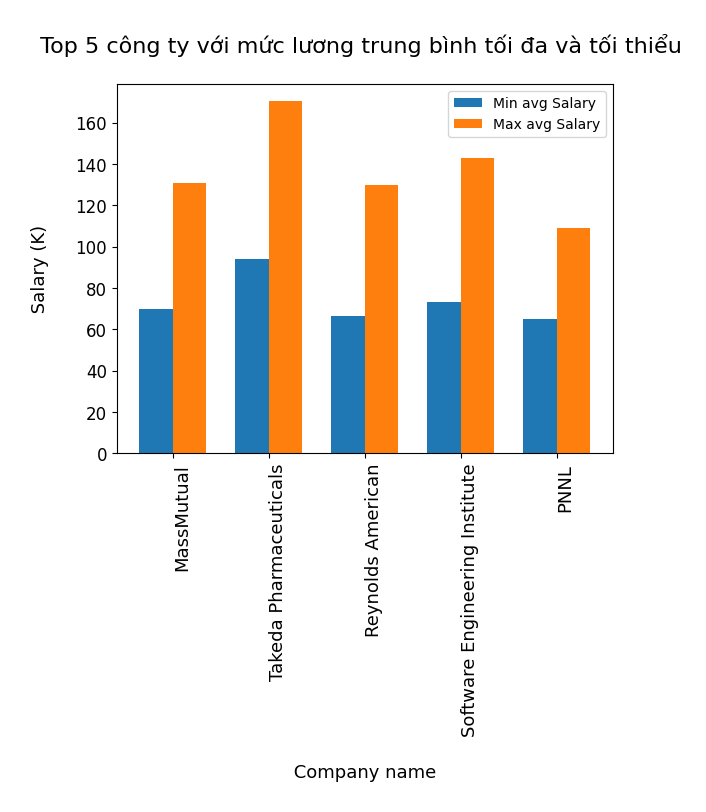

In [ ]:

# Sort companies based on the number of job postings
sort_com = datas["company_txt"].value_counts().sort_values(ascending=False).index

# Calculate mean lower and upper salaries for each company
com = datas.groupby("company_txt")[["Lower Salary", "Upper Salary"]].mean().sort_values("company_txt", ascending=False)
com = com.reset_index()

# Convert company_txt column to Category and set the sorter
com["company_txt"] = com["company_txt"].astype("category")
com["company_txt"] = com["company_txt"].cat.set_categories(sort_com)

# Reset and drop the index
com = com.sort_values(["company_txt"]).reset_index(drop=True)

# Draw the grouped bar plot
lab = com["company_txt"].head(5)
x = np.arange(len(lab))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, com["Lower Salary"].head(5), width, label='Min avg Salary')
rects2 = ax.bar(x + width/2, com["Upper Salary"].head(5), width, label='Max avg Salary')

# Beautify the plot
plt.title('\n Top 5 công ty với mức lương trung bình tối đa và tối thiểu  \n', size=16, color='black')
plt.xticks(fontsize=13, rotation=90, ha='right', rotation_mode='anchor')
plt.yticks(fontsize=12)
plt.xlabel('\n Company name \n', fontsize=13, color='black')
plt.ylabel('\n Salary (K) \n', fontsize=13, color='black')
ax.set_xticks(x)
ax.set_xticklabels(lab)
ax.legend(loc="upper right")

plt.show()


In [ ]:
pd.pivot_table(datas,index=["Job Title","seniority_by_title"],values="Avg Salary(K)")



,,Avg Salary(K)
Job Title,seniority_by_title,
Ag Data Scientist,na,80.5
Analytics - Business Assurance Data Analyst,na,43.0
Analytics Consultant,na,66.5
Analytics Manager,na,87.5
Analytics Manager - Data Mart,na,64.0
...,...,...
System and Data Analyst,na,59.0
Systems Engineer II - Data Analyst,na,62.5
"Technology-Minded, Data Professional Opportunities",na,70.5


## **8. Mức lương trung bình theo quy mô công ty**

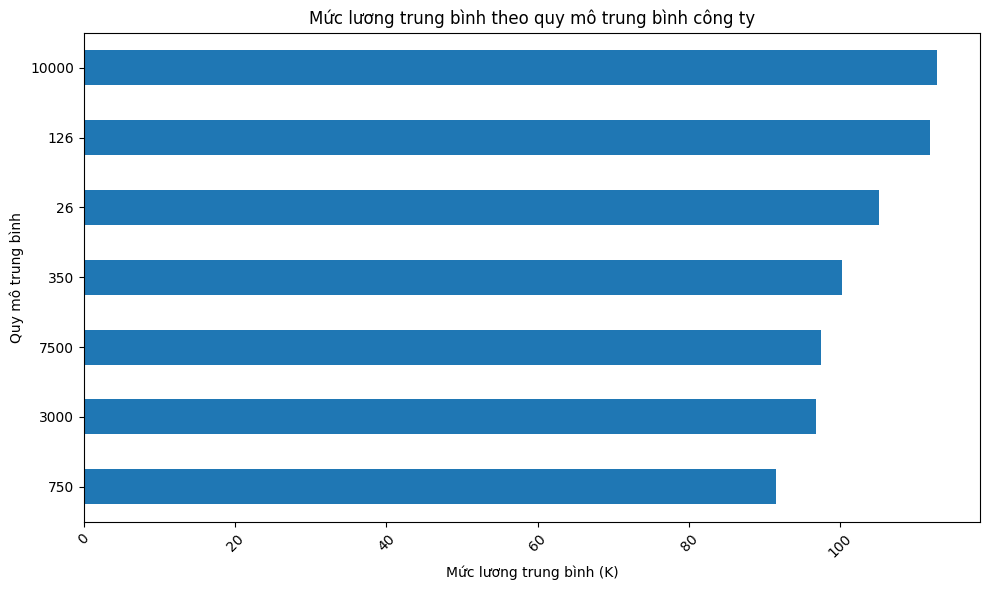

In [ ]:


# Mức lương trung bình theo quy mô trung bình công ty
avg_salary_by_size = datas.groupby("Size Avg")["Avg Salary(K)"].mean().sort_values(ascending=True)
plt.figure(figsize=(10, 6))
avg_salary_by_size.plot(kind='barh')
plt.title('Mức lương trung bình theo quy mô trung bình công ty')
plt.xlabel('Mức lương trung bình (K)')
plt.ylabel('Quy mô trung bình')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **9.Số lượng công ty theo kích thước**

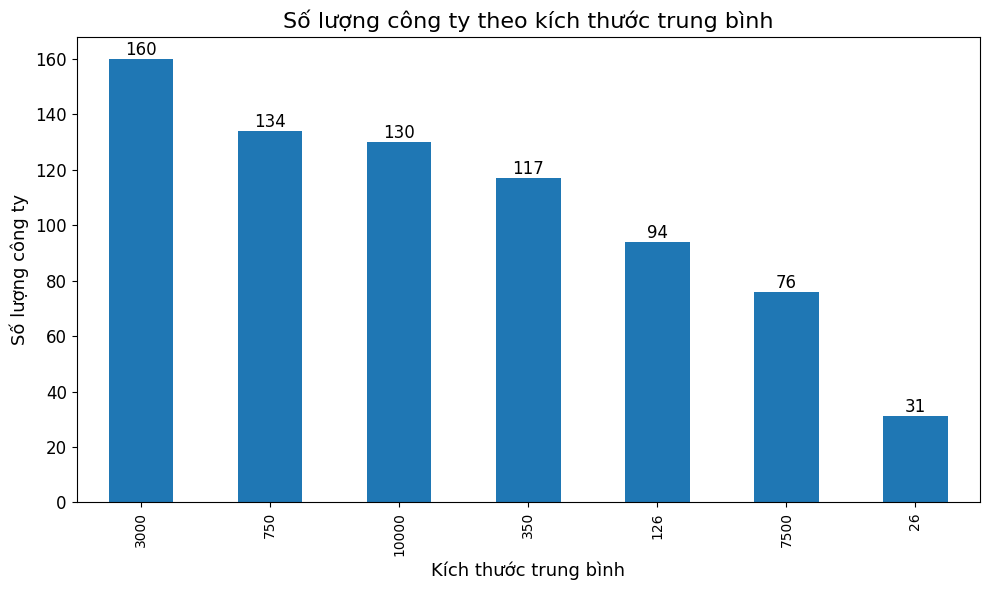

In [ ]:
revenue_counts = datas.groupby(["Size Avg"])['Company Name'].count().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = revenue_counts.plot(kind='bar')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=12)

# Làm đẹp biểu đồ
plt.title('Số lượng công ty theo kích thước trung bình', size=16)
plt.xlabel('Kích thước trung bình', fontsize=13)
plt.ylabel('Số lượng công ty', fontsize=13)
# plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## **10. Số lượng chức danh theo công việc và số lượng tin tuyển dụng của các chức danh theo khu vực**

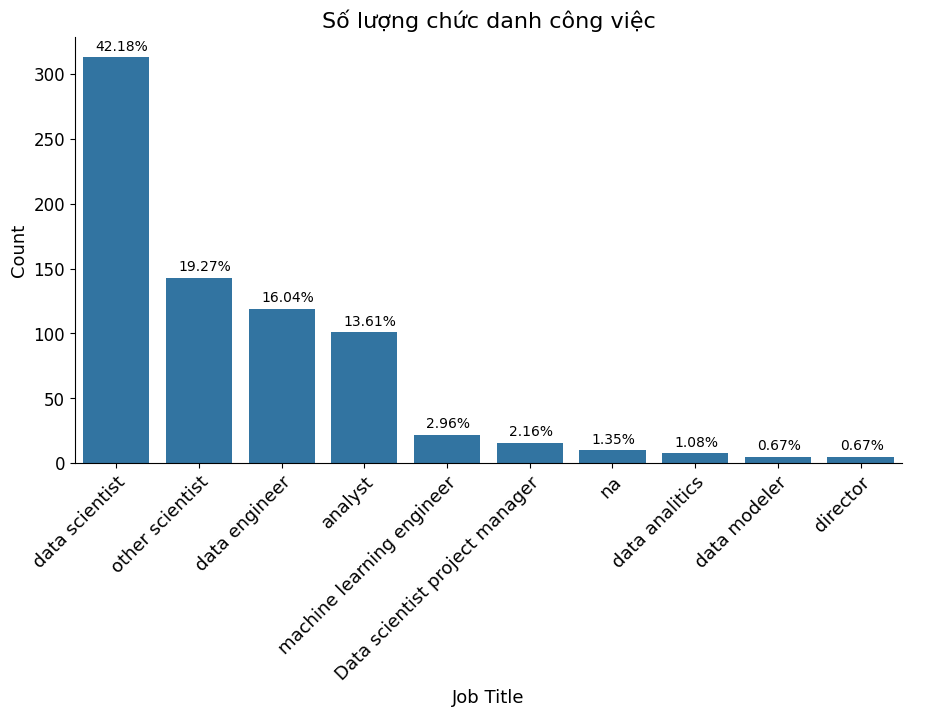

In [ ]:

# Create the count plot
catp = sns.catplot(x="job_title_sim", data=datas, order=datas["job_title_sim"].value_counts().index, kind="count")

# Set the size of the figure
catp.fig.set_size_inches(10, 5)

# Putting percentage on the bar plot
spots = datas["job_title_sim"].value_counts().index
ax = catp.facet_axis(0, 0)
for p in ax.patches:
    ax.text(p.get_x() + 0.15, p.get_height() + 5, '{:.2f}%'.format((p.get_height() / len(datas)) * 100))

# Beautifying the plot
plt.title('Số lượng chức danh công việc', size=16, color='black')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor', fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('Job Title', fontsize=13, color='black')
plt.ylabel('Count', fontsize=13, color='black')

# Show the plot
plt.show()

<ipython-input-29-7faf19bdc643>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=90)
<ipython-input-29-7faf19bdc643>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


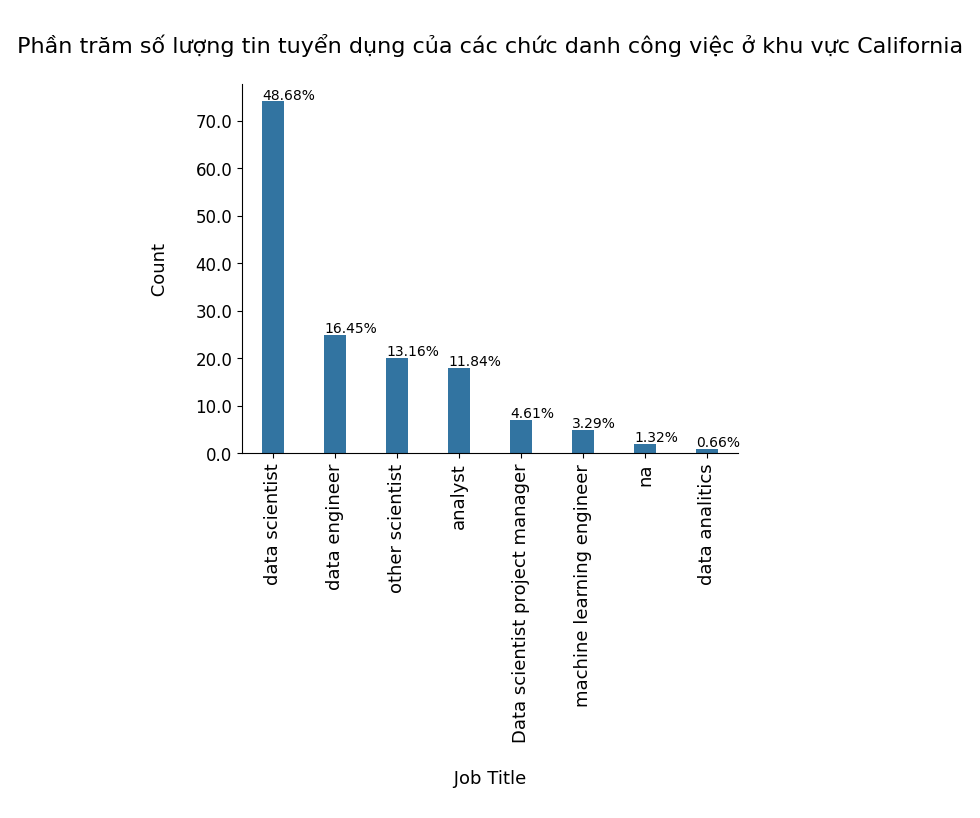

<ipython-input-29-7faf19bdc643>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=90)
<ipython-input-29-7faf19bdc643>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


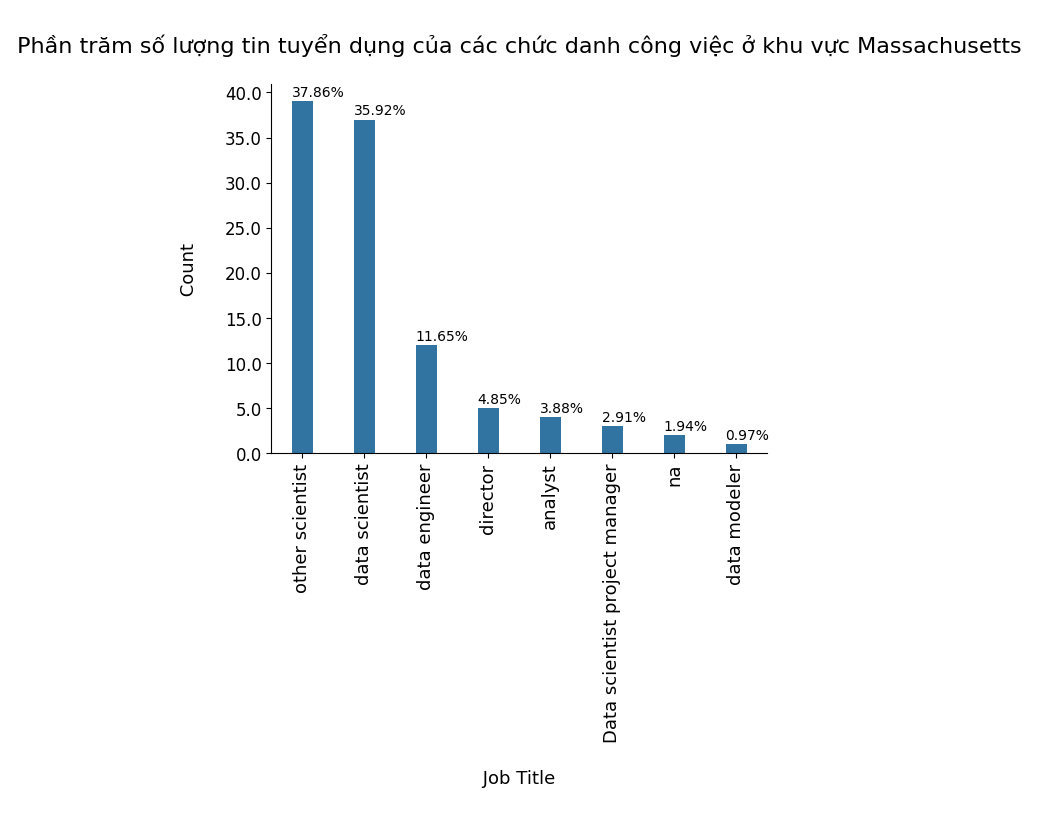

<ipython-input-29-7faf19bdc643>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=90)
<ipython-input-29-7faf19bdc643>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


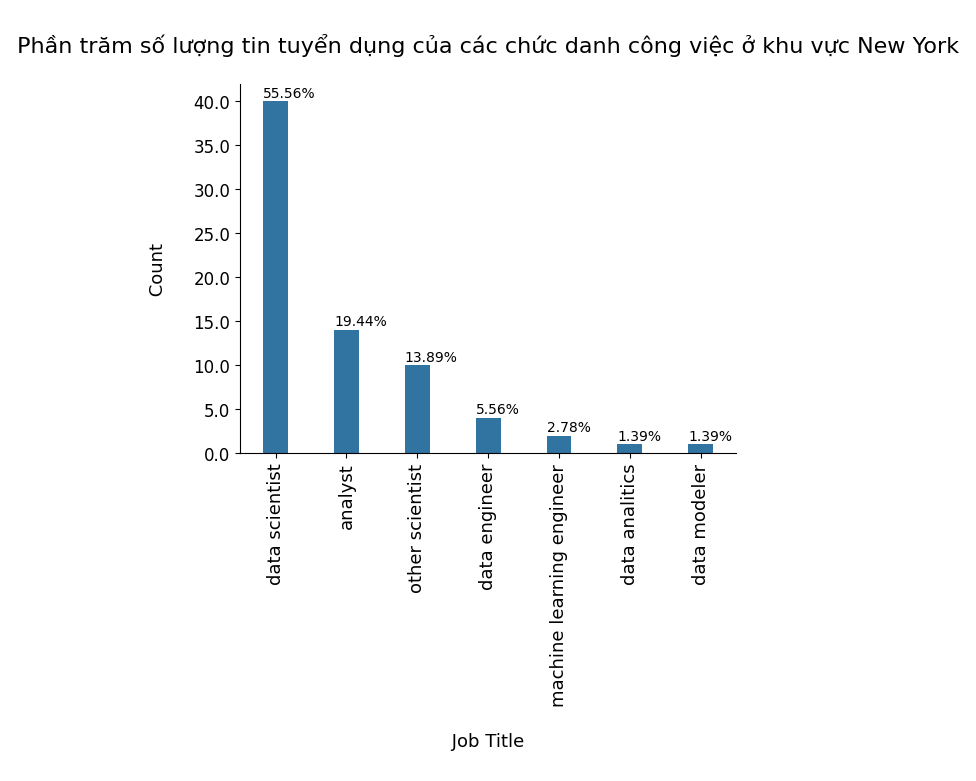

<ipython-input-29-7faf19bdc643>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=90)
<ipython-input-29-7faf19bdc643>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


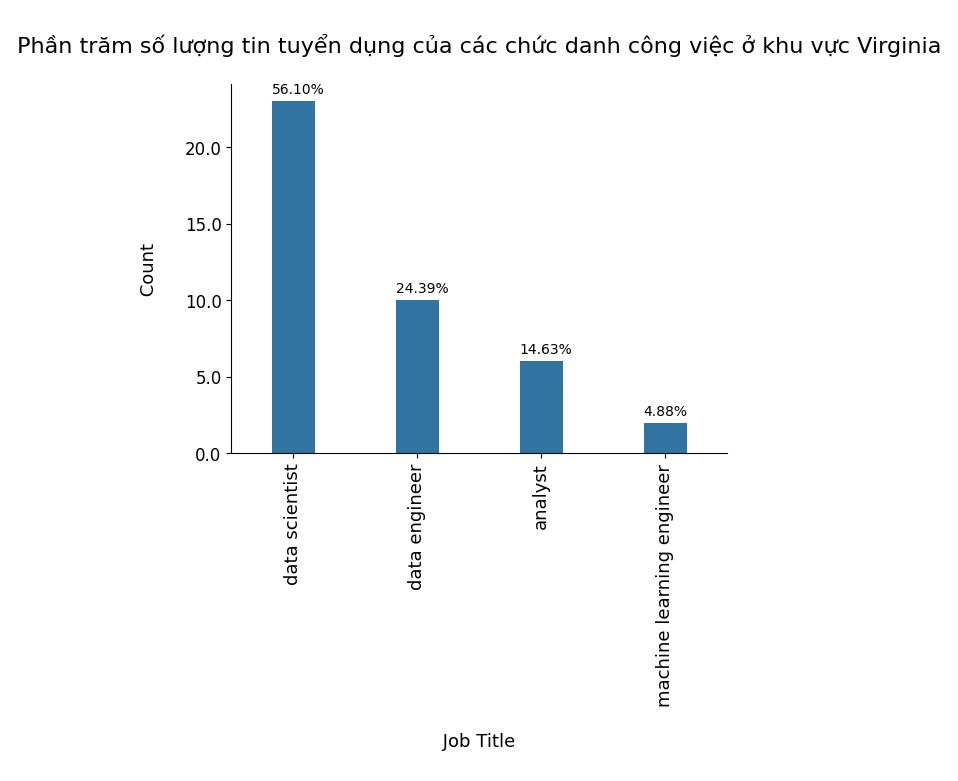

<ipython-input-29-7faf19bdc643>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=90)
<ipython-input-29-7faf19bdc643>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=12)


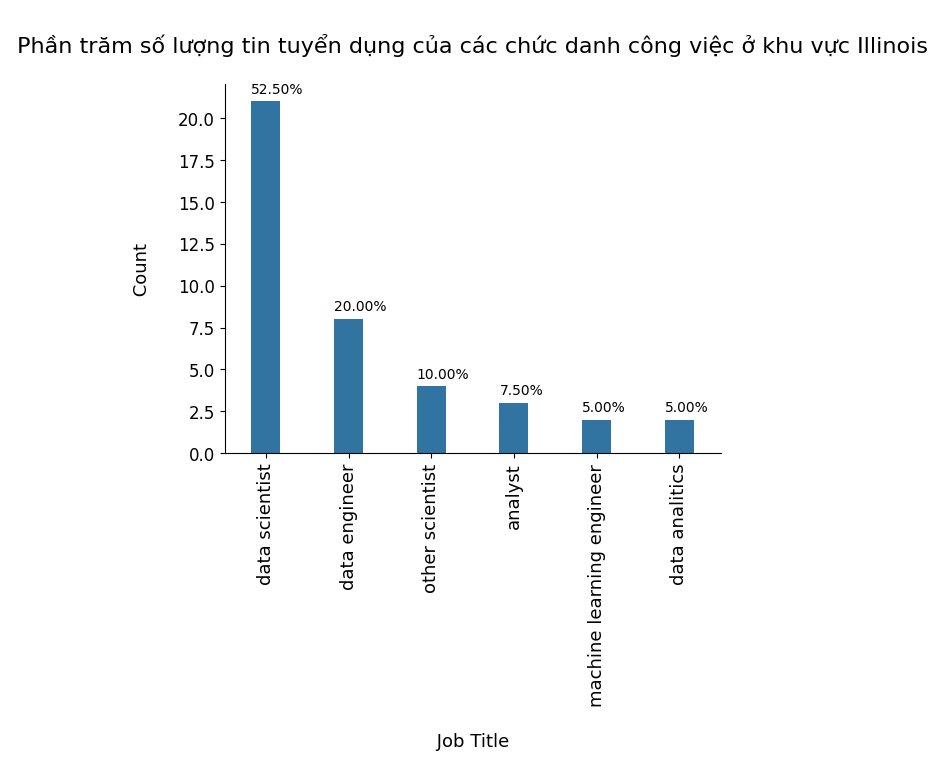

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define function to plot job titles
def plot_job_titles(data, state, ax):
    sns.barplot(x=data["job_title_sim"].value_counts().sort_values(ascending=False).index[0:10],
                y=data["job_title_sim"].value_counts().sort_values(ascending=False).head(10), ax=ax)
    change_width(ax, .35)
    sns.despine(bottom=False, left=False)
    for p in ax.patches:
        ax.text(p.get_x(), p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/data.shape[0])*100))
    ax.set_title(f'\n Phần trăm số lượng tin tuyển dụng của các chức danh công việc ở khu vực {state} \n', size=16, color='black')
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=13, rotation=90)
    ax.set_yticklabels(ax.get_yticks(), fontsize=12)
    ax.set_xlabel('\n Job Title \n', fontsize=13, color='black')
    ax.set_ylabel('\n Count \n', fontsize=13, color='black')

# Function to set bar width
def change_width(ax, new_value):
    for patch in ax.patches:
        current_width = patch.get_width()
        diff = current_width - new_value
        patch.set_width(new_value)
        patch.set_x(patch.get_x() + diff * .5)

# Define data
# Assuming you have already created data, a1, b1, c1, d1, e1
data = pd.DataFrame()  # Your DataFrame initialization here

# Define job title datasets for each state
state_datasets = {
    "California": a1,
    "Massachusetts": b1,
    "New York": c1,
    "Virginia": d1,
    "Illinois": e1
}

# Plot for each state
for state, state_data in state_datasets.items():
    fig, ax = plt.subplots(nrows=1, ncols=1)
    plot_job_titles(state_data, state, ax)
    plt.show()


## **11. Mức lương trung bình theo thâm niên**

In [ ]:
pd.pivot_table(data,index=["job_title_sim","seniority_by_title"],values="Avg Salary(K)")

Avg Salary(K)
job_title_sim                  seniority_by_title               
Data scientist project manager na                      73.218750
analyst                        jr                      53.250000
                               na                      61.215278
                               sr                      80.129630
data analitics                 na                      69.250000
data engineer                  na                      96.701220
                               sr                     124.689189
data modeler                   na                      77.500000
data scientist                 jr                     106.500000
                               na                     110.191038
                               sr                     135.590000
director                       na                     130.800000
machine learning engineer      na                     119.133333
                               sr                     142.071429
na                             na                      91.062500
                               sr                      93.000000
other scientist                na                      76.421875
                               sr                     111.819149

## **12. Mức lương trung bình theo từng mức doanh thu**

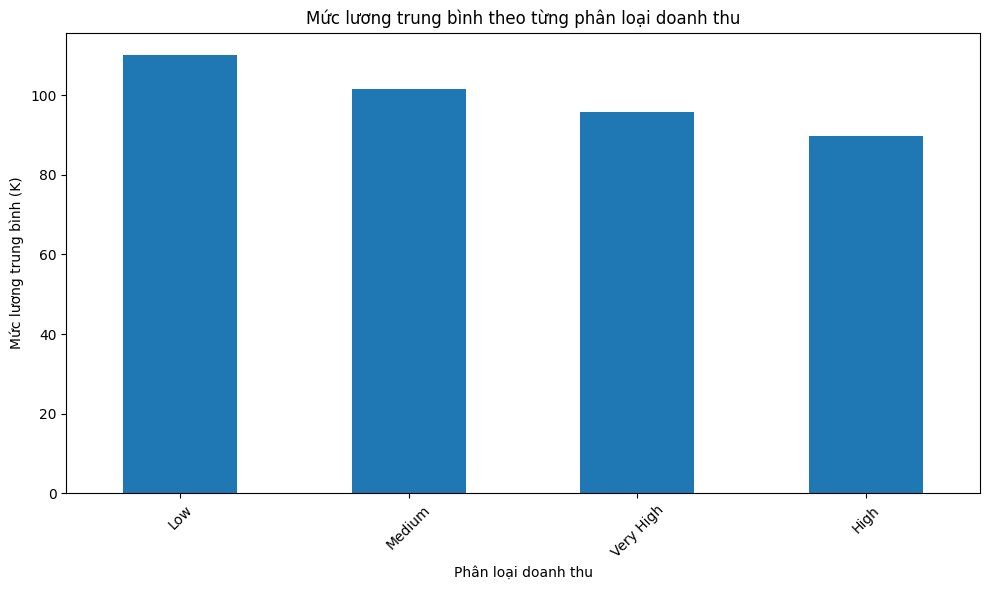

In [ ]:
# Mức lương trung bình theo từng phân loại doanh thu
avg_salary_salary_class = datas.groupby("Revenue class")["Avg Salary(K)"].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_salary_salary_class.plot(kind='bar')
plt.title('Mức lương trung bình theo từng phân loại doanh thu')
plt.xlabel('Phân loại doanh thu')
plt.ylabel('Mức lương trung bình (K)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **13. Mức lương trung bình và số lượng công ty theo doanh thu**

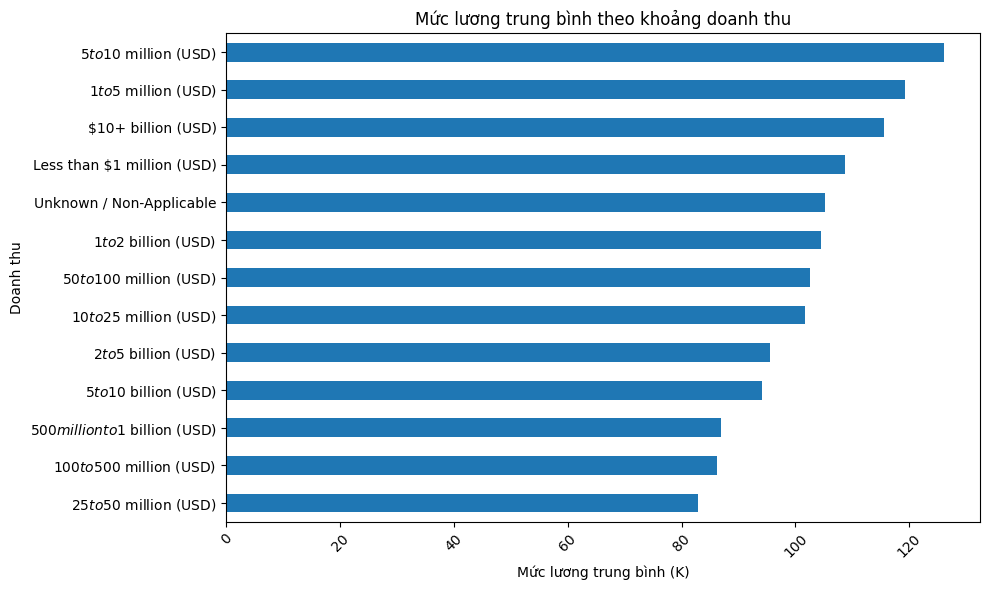

In [ ]:
# Mức lương trung bình theo khoảng doanh thu
avg_salary_by_size = datas.groupby("Revenue")["Avg Salary(K)"].mean().sort_values(ascending=True)
plt.figure(figsize=(10, 6))
avg_salary_by_size.plot(kind='barh')
plt.title('Mức lương trung bình theo khoảng doanh thu')
plt.xlabel('Mức lương trung bình (K)')
plt.ylabel('Doanh thu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

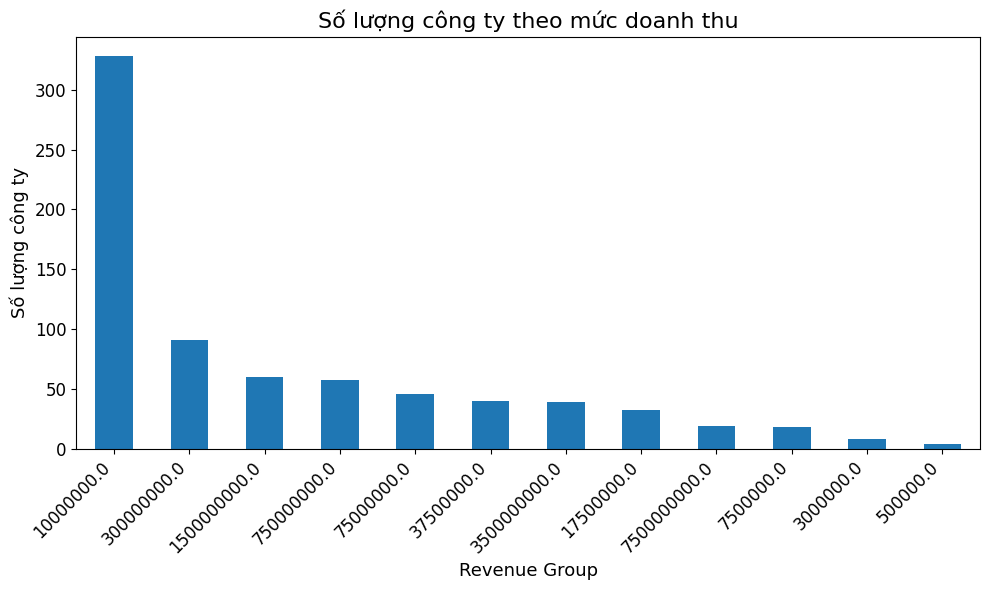

In [ ]:
# Đếm số lượng công ty theo mức doanh thu
revenue_counts = data['Revenue Avg'].value_counts()

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
revenue_counts.plot(kind='bar')
plt.title('Số lượng công ty theo mức doanh thu', size=16)
plt.xlabel('Revenue Group', fontsize=13)
plt.ylabel('Số lượng công ty', fontsize=13)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


## **14.Mối quan hệ giữa tuổi và quy mô công ty**

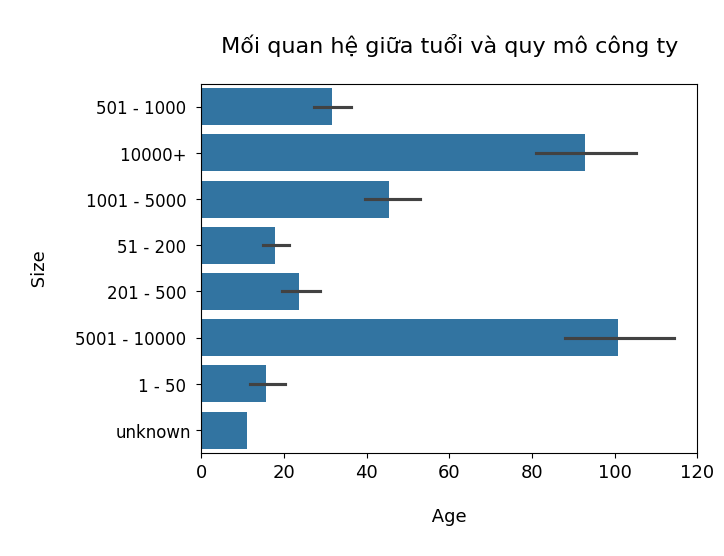

In [ ]:
# Looking at the relation between company's age and size
sns.barplot(x="Age",y="Size",data=datas)
#Beautifying the plot

plt.title('\n Mối quan hệ giữa tuổi và quy mô công ty \n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.ylabel('\n Size \n', fontsize=13, color='black')
plt.show()

## **15.Mối quan hệ giữa doanh thu và tuổi công ty**

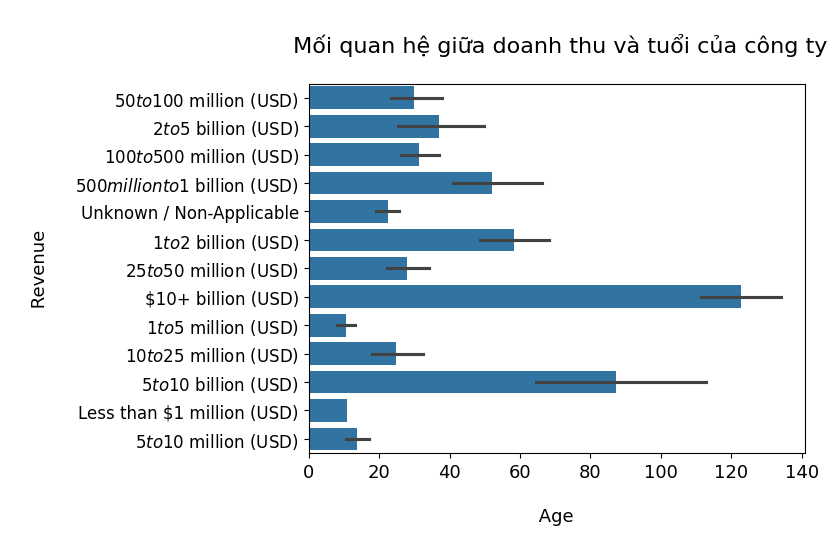

In [ ]:
# Looking at the relation between company's age and revenue
sns.barplot(x="Age",y="Revenue",data=datas)
#Beautifying the plot

plt.title('\n Mối quan hệ giữa doanh thu và tuổi của công ty\n', size=16, color='black')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlabel('\n Age \n', fontsize=13, color='black')
plt.ylabel('\n Revenue \n', fontsize=13, color='black')
plt.show()

## **16.Mức lương trung bình theo kỹ năng**

In [ ]:
import pandas as pd

# Chọn cột liên quan đến kỹ năng và mức lương trung bình
df_pivots = datas[['job_title_sim', 'Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an', 'Avg Salary(K)']]

# Danh sách các kỹ năng
skills = ['Python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']

# Lặp qua từng kỹ năng
for i in skills:
    # Tạo bảng pivot
    pivot_table = pd.pivot_table(df_pivots, index='job_title_sim', columns=i, values='Avg Salary(K)', aggfunc=['mean', 'count']).rename(columns={"mean": "Avg Salary(K)"})
    print(f"\nBảng pivot cho kỹ năng {i}:")
    print(pivot_table)



Bảng pivot cho kỹ năng Python:
                               Avg Salary(K)              count       
Python                                    NO         YES     NO    YES
job_title_sim                                                         
Data scientist project manager     69.833333   83.375000   12.0    4.0
analyst                            61.385714   76.790323   70.0   31.0
data analitics                     62.500000   73.300000    3.0    5.0
data engineer                     105.488095  105.357143   42.0   77.0
data modeler                       94.833333   51.500000    3.0    2.0
data scientist                    112.315068  120.112500   73.0  240.0
director                          130.800000         NaN    5.0    NaN
machine learning engineer         124.000000  126.972222    4.0   18.0
na                                 78.250000  111.250000    6.0    4.0
other scientist                    85.496212  118.772727  132.0   11.0

Bảng pivot cho kỹ năng spark:
              

# **C.Xây dựng mô hình**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
df = pd.read_csv('cleaned_data.csv')
df_model = df[[
    'Avg Salary(K)',
    'Rating',
    'Industry',
    'Sector',
    'Revenue Avg',
    'Hourly',
    'Employer provided',
    'Job Location',
    'Age',
    'Python',
    'spark',
    'aws',
    'excel',
    'sql',
    'sas',
    'keras',
    'pytorch',
    'scikit',
    'tensor',
    'hadoop',
    'tableau',
    'bi',
    'flink',
    'mongo',
    'google_an',
    'job_title_sim',
    'seniority_by_title',
]]
# get dummy data
df_dum = pd.get_dummies(df_model)

In [ ]:
X = df_dum.drop('Avg Salary(K)', axis =1)
y = df_dum['Avg Salary(K)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 10))

-19.63003529345503

In [ ]:
rf = RandomForestRegressor()
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 10))

-13.833966536416346

In [ ]:
# tune models GridsearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('friedman_mse','poisson')}
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=5)
gs.fit(X_train,y_train)
print("gs best score:", gs.best_score_)
print("gs best estimator:", gs.best_estimator_)

gs best score: -14.01115888804143
gs best estimator: RandomForestRegressor(criterion='friedman_mse', n_estimators=170)


In [ ]:
tpred_lm = lm.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

format_header = "{:<20} {:<8} {:<8} {:<8}"
format_string = "{:<20} {:<8.2f} {:<8.2f} {:<8.2f}"

print(format_header.format("Model", "MAE", "MSE", "R2"))
print(format_string.format("LinearRegression",
                           mean_absolute_error(y_test, tpred_lm),
                           mean_squared_error(y_test, tpred_lm),
                           r2_score(y_test, tpred_lm)
                           ))
print(format_string.format("RandomForest",
                           mean_absolute_error(y_test, tpred_rf),
                           mean_squared_error(y_test, tpred_rf),
                           r2_score(y_test, tpred_rf)
                           ))

Model                MAE      MSE      R2      
LinearRegression     19.86    773.92   0.51    
RandomForest         12.52    367.61   0.77    
